In [1]:
import pandas as pd

In [2]:
df_FinalCluster_Original = pd.read_csv('df_FinalCluster.csv',
                              dtype={'Distrito':'category','Plazas':'category','Barrio':'category'})

#                               dtype={'Distrito':'category','Gis_X':'category','Gis_Y':'category',
#                                      'Plazas':'category','Longitud':'category','Latitud':'category'})

df_FinalCluster_Original.info()
#df_FinalCluster

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ESTACION             179 non-null    int64   
 1   DEMANDA_RATIO        179 non-null    float64 
 2   Gis_X                179 non-null    float64 
 3   Gis_Y                179 non-null    float64 
 4   Distrito             179 non-null    category
 5   Barrio               179 non-null    category
 6   Plazas               179 non-null    category
 7   Longitud             179 non-null    float64 
 8   Latitud              179 non-null    float64 
 9   Tasa_Paro            179 non-null    float64 
 10  Renta_Media_Persona  179 non-null    float64 
 11  Renta_Media_Hogar    179 non-null    float64 
 12  Poblacion            179 non-null    float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 16.7 KB


## Selección de Variables Geográficas

In [3]:
df_FinalCluster = df_FinalCluster_Original.copy()

df_FinalCluster = df_FinalCluster.drop(columns='ESTACION')

df_FinalCluster = df_FinalCluster.drop(columns=['DEMANDA_RATIO', 'Plazas', 'Tasa_Paro', 'Renta_Media_Persona',
                                               'Renta_Media_Hogar', 'Poblacion'])

df_FinalCluster.info()

num_cols = list(df_FinalCluster._get_numeric_data().columns)
cat_cols = list(set(df_FinalCluster.columns) - set(num_cols))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Gis_X     179 non-null    float64 
 1   Gis_Y     179 non-null    float64 
 2   Distrito  179 non-null    category
 3   Barrio    179 non-null    category
 4   Longitud  179 non-null    float64 
 5   Latitud   179 non-null    float64 
dtypes: category(2), float64(4)
memory usage: 7.8 KB


In [4]:
print(num_cols)
print(cat_cols)

['Gis_X', 'Gis_Y', 'Longitud', 'Latitud']
['Distrito', 'Barrio']


In [5]:
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

%matplotlib inline

pd.set_option('display.max_rows', 5)

## Creación de DF final para KNN

### Transformando categóricas: One Hot Encoder (variables dummies)

In [6]:
df_cat = df_FinalCluster[cat_cols]
df_cat

,Distrito,Barrio
0,1,01-06
1,1,01-06
...,...,...
177,4,04-04
178,6,06-05


In [7]:
OneHot = OneHotEncoder(handle_unknown='ignore', drop='first')
OneHot.fit(df_cat.values)

df_cat_OneHot = OneHot.transform(df_cat.values).toarray()
df_cat_OneHot.shape

(179, 43)

### Concatenación de DF: Numéricos y Categóricas

In [8]:
df_knn_final = pd.concat([df_FinalCluster[num_cols], pd.DataFrame(df_cat_OneHot)], axis=1)
df_knn_final.columns = df_knn_final.columns.astype(str)
df_knn_final.info()
df_knn_final

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gis_X     179 non-null    float64
 1   Gis_Y     179 non-null    float64
 2   Longitud  179 non-null    float64
 3   Latitud   179 non-null    float64
 4   0         179 non-null    float64
 5   1         179 non-null    float64
 6   2         179 non-null    float64
 7   3         179 non-null    float64
 8   4         179 non-null    float64
 9   5         179 non-null    float64
 10  6         179 non-null    float64
 11  7         179 non-null    float64
 12  8         179 non-null    float64
 13  9         179 non-null    float64
 14  10        179 non-null    float64
 15  11        179 non-null    float64
 16  12        179 non-null    float64
 17  13        179 non-null    float64
 18  14        179 non-null    float64
 19  15        179 non-null    float64
 20  16        179 non-null    float6

,Gis_X,Gis_Y,Longitud,Latitud,0,1,2,3,4,5,...,33,34,35,36,37,38,39,40,41,42
0,440443.61,4474290.65,-3.701998,40.417111,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,440480.56,4474301.74,-3.701564,40.417213,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,442830.66,4476215.36,-3.674037,40.434617,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178,440874.02,4479384.51,-3.697399,40.463029,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Reducción de dimensionalidad PCA

In [9]:
df_pca_2 = PCA(n_components=2).fit_transform(df_knn_final)
df_pca_3 = PCA(n_components=3).fit_transform(df_knn_final)
df_pca_4 = PCA(n_components=4).fit_transform(df_knn_final)
df_pca_5 = PCA(n_components=5).fit_transform(df_knn_final)


In [10]:
df_pca_3

array([[-8.27901173e+02, -5.84316184e+02, -1.04849289e-02],
       [-8.13515981e+02, -5.48520141e+02, -1.34729493e-02],
       [-4.69824870e+02, -9.26872335e+02,  1.02944392e-03],
       [ 5.97175915e+02, -1.14608647e+03, -1.05940252e-01],
       [ 4.37320335e+02, -7.46578000e+02, -3.59950455e-02],
       [ 4.16245942e+02, -6.93796500e+02, -5.90475938e-02],
       [-2.25817156e+01, -3.45496197e+02, -7.28835836e-02],
       [ 9.85690502e+01, -2.98547038e+02, -7.94953847e-02],
       [ 3.91968562e+02, -1.15734354e+02, -1.93661275e-01],
       [-1.04538773e+03, -1.19726359e+03,  3.84714338e-02],
       [ 1.58849516e+02,  1.78105072e+02, -1.15827298e-01],
       [ 2.60475288e+02, -8.12399184e+02, -2.65413444e-02],
       [ 4.05507967e+02, -1.04579725e+03, -1.33463382e-02],
       [ 2.47238877e+02, -1.39466702e+03,  1.62507704e-02],
       [ 7.49518662e+01, -1.62762484e+03,  9.57661732e-02],
       [ 1.50451292e+02, -1.12180914e+03, -1.09074237e-03],
       [-2.21255627e+02, -1.10250446e+03

## Clustering KNN: Métricas Elbow y Silhouette para elegir mejor valor de k

### Usando df_pca_2

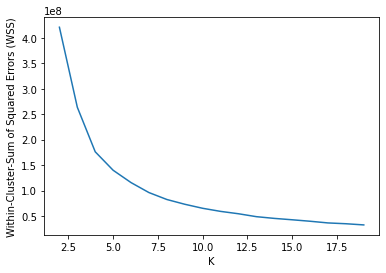

In [11]:
# ELBOW

K=range(2,20)
wss = []

for k in K:
    kmeans=cluster.KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,)
    kmeans=kmeans.fit(df_pca_2)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
    
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [12]:
# SILHOUETTE
K=range(2,20)
for k in K:
    labels=KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=200,).fit(df_pca_2).labels_
    print ("Silhouette score for k(clusters) = "+str(k)+" is "+str(metrics.silhouette_score(df_pca_2,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.3691340074573513
Silhouette score for k(clusters) = 3 is 0.40415634902055325
Silhouette score for k(clusters) = 4 is 0.4160673973079331
Silhouette score for k(clusters) = 5 is 0.40360085786494376
Silhouette score for k(clusters) = 6 is 0.38490002916034766
Silhouette score for k(clusters) = 7 is 0.3936166328867699
Silhouette score for k(clusters) = 8 is 0.3794199797813067
Silhouette score for k(clusters) = 9 is 0.369018479459476
Silhouette score for k(clusters) = 10 is 0.3746105044158588
Silhouette score for k(clusters) = 11 is 0.3774647074815318
Silhouette score for k(clusters) = 12 is 0.38488984712890695
Silhouette score for k(clusters) = 13 is 0.3710080293561165
Silhouette score for k(clusters) = 14 is 0.3783750904565541
Silhouette score for k(clusters) = 15 is 0.363821454337297
Silhouette score for k(clusters) = 16 is 0.3663010256814416
Silhouette score for k(clusters) = 17 is 0.36567663464912414
Silhouette score for k(clusters) = 18 is 0.35

### Usando df_pca_3

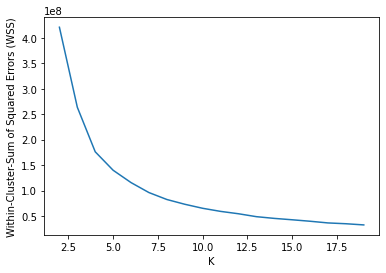

In [13]:
K=range(2,20)
wss = []

for k in K:
    kmeans=cluster.KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,)
    kmeans=kmeans.fit(df_pca_3)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
    
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [14]:
# SILHOUETTE
K=range(2,20)
for k in K:
    labels=KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=200,).fit(df_pca_3).labels_
    print ("Silhouette score for k(clusters) = "+str(k)+" is "+str(metrics.silhouette_score(df_scale,labels,metric="euclidean",sample_size=1000,random_state=200)))

NameError: name 'df_scale' is not defined

### Usando df_pca_4

In [ ]:
K=range(2,20)
wss = []

for k in K:
    kmeans=cluster.KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,)
    kmeans=kmeans.fit(df_pca_4)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
    
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [ ]:
# SILHOUETTE
K=range(2,20)
for k in K:
    labels=KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=200,).fit(df_pca_4).labels_
    print ("Silhouette score for k(clusters) = "+str(k)+" is "+str(metrics.silhouette_score(df_scale,labels,metric="euclidean",sample_size=1000,random_state=200)))

### Usando df_pca_5

In [ ]:
K=range(2,20)
wss = []

for k in K:
    kmeans=cluster.KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,)
    kmeans=kmeans.fit(df_pca_5)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
    
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [ ]:
# SILHOUETTE
K=range(2,20)
for k in K:
    labels=KMeans(
               n_clusters=k,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=200,).fit(df_pca_5).labels_
    print ("Silhouette score for k(clusters) = "+str(k)+" is "+str(metrics.silhouette_score(df_scale,labels,metric="euclidean",sample_size=1000,random_state=200)))

## Clustering con 5 cluster

In [15]:
n_cluster = 5

scaler = MinMaxScaler()
kmeans = KMeans(
               n_clusters=n_cluster,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=200,)

pipeline = make_pipeline(scaler, kmeans)
pipeline

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kmeans',
                 KMeans(max_iter=500, n_clusters=5, n_init=50,
                        random_state=200))])

In [16]:
df_pred_pca2_t = pipeline.fit_transform(df_pca_2)
df_pred_pca2 = pipeline.fit_predict(df_pca_2)
df_pred_pca3 = pipeline.fit_predict(df_pca_3)
df_pred_pca4 = pipeline.fit_predict(df_pca_4)
df_pred_pca5 = pipeline.fit_predict(df_pca_5)


In [17]:
df_pred_pca2_t

array([[0.4825232 , 0.13654562, 0.44991992, 0.17389988, 0.22654121],
       [0.47932599, 0.13539158, 0.44314725, 0.17849494, 0.22026511],
       [0.45677041, 0.20924797, 0.50991082, 0.09589297, 0.25785672],
       [0.35475136, 0.34727063, 0.56538458, 0.098276  , 0.28247255],
       [0.33604952, 0.29922387, 0.4889755 , 0.13440716, 0.20683786],
       [0.33480407, 0.29378454, 0.4788837 , 0.14160402, 0.19689484],
       [0.37226938, 0.22632088, 0.40575778, 0.18999533, 0.13752881],
       [0.35551633, 0.24141368, 0.39943461, 0.19995149, 0.12543077],
       [0.31446339, 0.28015589, 0.37485112, 0.24036788, 0.0906892 ],
       [0.54437774, 0.19820483, 0.56564931, 0.12716139, 0.33561678],
       [0.34590734, 0.26124931, 0.3147999 , 0.28813763, 0.0386411 ],
       [0.361791  , 0.28184853, 0.49633895, 0.11319796, 0.21799022],
       [0.36512504, 0.31678557, 0.54207788, 0.08823666, 0.26150927],
       [0.41827809, 0.3351405 , 0.60209822, 0.04382796, 0.32535613],
       [0.46243719, 0.34816376, 0.

In [18]:
df_pred_pca2

array([1, 1, 3, 3, 3, 3, 4, 4, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3,
       3, 3, 3, 3, 4, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 4, 3, 4, 2, 2, 2, 4, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 4, 4, 4,
       2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 4, 3, 3, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 4, 3, 4, 4, 4, 4, 3, 4, 2, 2, 0, 0, 3, 3, 1, 1, 2, 2, 2, 2,
       4, 2, 0])

In [19]:
df_pred_pca3

array([1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4,
       4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 1, 1, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 4, 1, 4, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 4, 0, 0, 2, 2, 4, 4, 2, 2, 0, 0, 4, 4, 1, 1, 2, 2, 2, 2,
       2, 2, 0])

In [20]:
df_pred_pca4

array([0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 3, 3, 2, 2, 3, 3, 4, 4, 0, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 4])

In [21]:
df_pred_pca5

array([0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 3, 3, 3, 4, 4, 3, 3, 4, 4, 2, 2, 0, 0, 0, 0, 4, 4, 4, 4,
       4, 4, 2])

In [22]:
df_final_Clusterizado = pd.concat([df_FinalCluster_Original, pd.DataFrame(df_pred_pca3)], axis=1)
#df_final_Clusterizado.columns['0'] = 'CLUSTER'
df_final_Clusterizado.rename(columns={0: 'CLUSTER'}, inplace=True)
df_final_Clusterizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ESTACION             179 non-null    int64   
 1   DEMANDA_RATIO        179 non-null    float64 
 2   Gis_X                179 non-null    float64 
 3   Gis_Y                179 non-null    float64 
 4   Distrito             179 non-null    category
 5   Barrio               179 non-null    category
 6   Plazas               179 non-null    category
 7   Longitud             179 non-null    float64 
 8   Latitud              179 non-null    float64 
 9   Tasa_Paro            179 non-null    float64 
 10  Renta_Media_Persona  179 non-null    float64 
 11  Renta_Media_Hogar    179 non-null    float64 
 12  Poblacion            179 non-null    float64 
 13  CLUSTER              179 non-null    int32   
dtypes: category(3), float64(9), int32(1), int64(1)
memory usage: 17.4 KB


In [25]:
df_final_Clusterizado.to_csv('../../data/Clusterizada_soloGeografico.csv', index=False)

In [26]:
df_final_Clusterizado

,ESTACION,DEMANDA_RATIO,Gis_X,Gis_Y,Distrito,Barrio,Plazas,Longitud,Latitud,Tasa_Paro,Renta_Media_Persona,Renta_Media_Hogar,Poblacion,CLUSTER
0,1,2450.230769,440443.61,4474290.65,1,01-06,30,-3.701998,40.417111,4.309681,17550.00279,35056.88536,7665.0,1
1,2,1273.636364,440480.56,4474301.74,1,01-06,30,-3.701564,40.417213,4.309681,17550.00279,35056.88536,7665.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,199,868.285714,442830.66,4476215.36,4,04-04,18,-3.674037,40.434617,3.819713,21251.03416,50063.95065,42445.0,2
178,215,693.857143,440874.02,4479384.51,6,06-05,18,-3.697399,40.463029,5.899887,12254.49279,30163.55029,26607.0,0
